In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
data= pd.read_csv('diabetes.csv')

In [3]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Taking care of missing data

In [4]:
data.apply(lambda x: sum(x.isnull()),axis=0)

preg     0
 plas    0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
#from the above output, we can concluded that there are no none values, but we cannot say that there are no missing values

In [6]:
data.apply(lambda x: sum(x==0),axis=0)

preg     111
 plas      5
pres      35
Skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

In [7]:
#there are some missing values, let's  replace them

In [8]:
data.columns = data.columns.str.strip() 

In [9]:
data['plas'].replace(0,np.NaN,inplace=True)
data['pres'].replace(0,np.NaN,inplace=True)
data['Skin'].replace(0,np.NaN,inplace=True)
data['mass'].replace(0,np.NaN,inplace=True)
data['test'].replace(0,np.NaN,inplace=True)

In [10]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [11]:
data.apply(lambda x: sum(x.isnull()),axis=0)

preg       0
plas       5
pres      35
Skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [12]:
data['plas'].fillna(data['plas'].mean(), inplace=True)
data['pres'].fillna(data['pres'].mean(), inplace=True)
data['Skin'].fillna(data['Skin'].mean(), inplace=True)
data['mass'].fillna(data['mass'].mean(), inplace=True)
data['test'].fillna(data['test'].mean(), inplace=True)

In [13]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [14]:
data.apply(lambda x: sum(x.isnull()),axis=0)

preg     0
plas     0
pres     0
Skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [15]:
data.describe()

,preg,plas,pres,Skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [17]:
data['test'].iplot(kind='box', title='test')

In [18]:
data['preg'].iplot(kind='box', title='test')

In [19]:
data['plas'].iplot(kind='box', title='test')

In [20]:
data['pres'].iplot(kind='box', title='test')

In [21]:
#from the above Box plots we concluded that plas and preg have outliers.(diff between min & max)

In [22]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.63994726 0.86510807 0.03351824 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.20616153 0.52985903 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 2.0158134  0.69530596 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.0225789  0.03351824 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.14180757 1.02619983 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.94314317 0.19896517 ... 0.47378505 0.87137393 0.73212021]]


In [23]:
data = data[(z < 3).all(axis=1)]

In [24]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [25]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

preg      5.000000
plas     39.000000
pres     16.000000
Skin      7.000000
test     35.548223
mass      8.700000
pedi      0.358000
age      16.000000
class     1.000000
dtype: float64


In [26]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
data

,preg,plas,pres,Skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [28]:
data.describe()

,preg,plas,pres,Skin,test,mass,pedi,age,class
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,4.017822,119.385638,72.135388,28.689091,145.186480,31.859638,0.407230,33.156436,0.338614
std,3.262595,27.823201,10.548561,5.610000,26.754156,5.940391,0.239005,10.734590,0.473708
min,0.000000,44.000000,44.000000,15.000000,67.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,27.000000,146.000000,27.600000,0.231000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,29.153420,155.548223,32.000000,0.328000,30.000000,0.000000
75%,6.000000,135.000000,78.000000,30.000000,155.548223,35.400000,0.559000,41.000000,1.000000
max,13.000000,196.000000,104.000000,42.000000,207.000000,48.300000,1.136000,64.000000,1.000000


In [29]:
data.corr()

,preg,plas,pres,Skin,test,mass,pedi,age,class
preg,1.000000,0.103265,0.195353,0.131074,0.116840,0.033638,-0.013216,0.543050,0.197644
plas,0.103265,1.000000,0.196021,0.058278,0.174539,0.159199,0.033110,0.234682,0.472459
pres,0.195353,0.196021,1.000000,0.118003,0.107169,0.213326,0.004851,0.354883,0.150063
Skin,0.131074,0.058278,0.118003,1.000000,0.127684,0.398537,0.048394,0.081927,0.155394
test,0.116840,0.174539,0.107169,0.127684,1.000000,0.033052,-0.027311,0.191520,0.153292
mass,0.033638,0.159199,0.213326,0.398537,0.033052,1.000000,0.157117,0.042260,0.264702
pedi,-0.013216,0.033110,0.004851,0.048394,-0.027311,0.157117,1.000000,0.023011,0.155930
age,0.543050,0.234682,0.354883,0.081927,0.191520,0.042260,0.023011,1.000000,0.245525
class,0.197644,0.472459,0.150063,0.155394,0.153292,0.264702,0.155930,0.245525,1.000000


# Task 18828- Label encoding

In [30]:
#No need to perform label encoding, as there is no categorical data(textual data) in the dataset.

# Task 18827- One hot encoding

In [31]:
#As we didn't perform label encoding, we need not to perform one hot encoding. 

In [32]:
X=data.iloc[:,:-1]
y=data.iloc[:,8]


In [33]:
X

,preg,plas,pres,Skin,test,mass,pedi,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [34]:
y

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: class, Length: 505, dtype: int64

# Task 18828- Feature Scaling

In [35]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.46153846, 0.68421053, 0.46666667, ..., 0.51162791, 0.51890359,
        0.6744186 ],
       [0.07692308, 0.26973684, 0.36666667, ..., 0.27906977, 0.25803403,
        0.23255814],
       [0.61538462, 0.91447368, 0.33333333, ..., 0.16943522, 0.56143667,
        0.25581395],
       ...,
       [0.38461538, 0.50657895, 0.46666667, ..., 0.26578073, 0.15784499,
        0.20930233],
       [0.07692308, 0.53947368, 0.26666667, ..., 0.39534884, 0.25614367,
        0.60465116],
       [0.07692308, 0.32236842, 0.43333333, ..., 0.40531561, 0.22400756,
        0.04651163]])

# Task 18829- Splitting the dataset into Training set and Test set

In [36]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [37]:
y_train

512    0
65     0
451    1
440    1
758    0
      ..
344    0
318    0
361    0
156    0
683    1
Name: class, Length: 353, dtype: int64

In [38]:
X_test

,preg,plas,pres,Skin,test,mass,pedi,age
240,1,91.0,64.000000,24.00000,155.548223,29.200000,0.192,21
494,3,80.0,72.405184,29.15342,155.548223,32.457464,0.174,22
411,1,112.0,72.000000,30.00000,176.000000,34.400000,0.528,25
14,5,166.0,72.000000,19.00000,175.000000,25.800000,0.587,51
570,3,78.0,70.000000,29.15342,155.548223,32.500000,0.270,39
...,...,...,...,...,...,...,...,...
506,0,180.0,90.000000,26.00000,90.000000,36.500000,0.314,35
230,4,142.0,86.000000,29.15342,155.548223,44.000000,0.645,22
439,6,107.0,88.000000,29.15342,155.548223,36.800000,0.727,31
557,8,110.0,76.000000,29.15342,155.548223,27.800000,0.237,58


In [39]:
y_test

240    0
494    0
411    0
14     1
570    0
      ..
506    1
230    1
439    0
557    0
528    0
Name: class, Length: 152, dtype: int64

In [40]:
X_train

,preg,plas,pres,Skin,test,mass,pedi,age
512,9,91.0,68.0,29.15342,155.548223,24.2,0.200,58
65,5,99.0,74.0,27.00000,155.548223,29.0,0.203,32
451,2,134.0,70.0,29.15342,155.548223,28.9,0.542,23
440,0,189.0,104.0,25.00000,155.548223,34.3,0.435,41
758,1,106.0,76.0,29.15342,155.548223,37.5,0.197,26
...,...,...,...,...,...,...,...,...
344,8,95.0,72.0,29.15342,155.548223,36.8,0.485,57
318,3,115.0,66.0,39.00000,140.000000,38.1,0.150,28
361,5,158.0,70.0,29.15342,155.548223,29.8,0.207,63
156,2,99.0,52.0,15.00000,94.000000,24.6,0.637,21


# KNN Test

In [41]:
knn_cls = neighbors.KNeighborsClassifier()
knn_cls.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_test_pred=knn_cls.predict(X_test)

In [43]:
y_test

240    0
494    0
411    0
14     1
570    0
      ..
506    1
230    1
439    0
557    0
528    0
Name: class, Length: 152, dtype: int64

In [44]:
y_test_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [45]:
#Build confusion matrix on Test and Train
from sklearn.metrics import confusion_matrix
knn_cls_cm_test = confusion_matrix(y_test,y_test_pred)
knn_cls_cm_test

array([[75, 22],
       [23, 32]], dtype=int64)

In [46]:
precision=knn_cls_cm_test[0][0]/(knn_cls_cm_test[0][0]+knn_cls_cm_test[0][1])
precision

0.7731958762886598

In [47]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =knn_cls.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

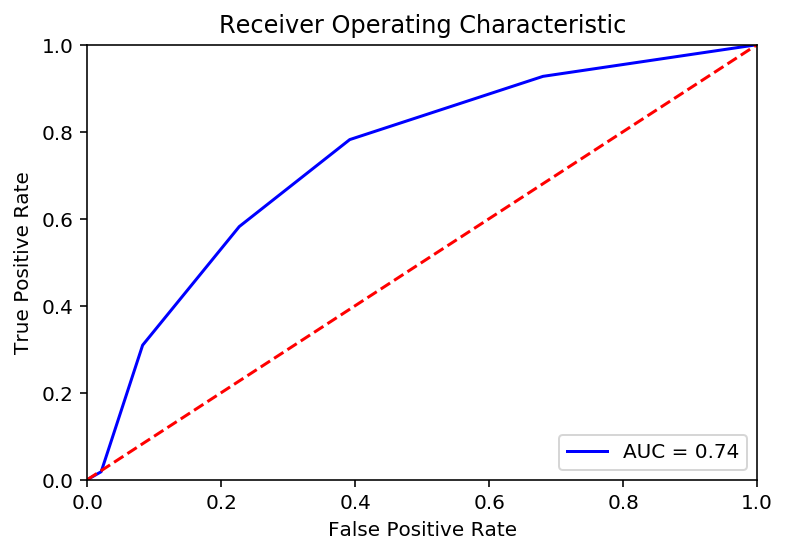

In [48]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_test_pred) * 100))
print("Recall score : %f" %(recall_score(y_test,y_test_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,y_test_pred) * 100))
print(confusion_matrix(y_test,y_test_pred)) 


Accuracy score: 73.026316
Recall score : 41.818182
ROC score : 66.269916

[[88  9]
 [32 23]]


In [50]:
y_train_pred=knn_cls.predict(X_train)
knn_cls_cm_train = confusion_matrix(y_train,y_train_pred)
knn_cls_cm_train

array([[205,  32],
       [ 44,  72]], dtype=int64)

In [51]:
precision=knn_cls_cm_train[0][0]/(knn_cls_cm_train[0][0]+knn_cls_cm_train[0][1])
precision

0.8649789029535865

In [52]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,y_train_pred) * 100))
print("Recall score : %f" %(recall_score(y_train,y_train_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train,y_train_pred) * 100))
print(confusion_matrix(y_train,y_train_pred)) 


Accuracy score: 78.470255
Recall score : 62.068966
ROC score : 74.283428

[[205  32]
 [ 44  72]]


# Logistic Regression

In [53]:
from sklearn.linear_model.logistic import LogisticRegression
cls =LogisticRegression(random_state =0)

lr=cls.fit(X_train, y_train)
y_test_pred =lr.predict(X_test)
y_test_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [54]:
lr_cm_test = confusion_matrix(y_test,y_test_pred)
lr_cm_test

array([[88,  9],
       [32, 23]], dtype=int64)

In [55]:
precision=lr_cm_test[0][0]/(lr_cm_test[0][0]+lr_cm_test[0][1])
precision

0.9072164948453608

In [56]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_test_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_test_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_test_pred) * 100))
print(confusion_matrix(y_test, y_test_pred)) 


Accuracy score: 73.026316
Recall score : 41.818182
ROC score : 66.269916

[[88  9]
 [32 23]]


In [57]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

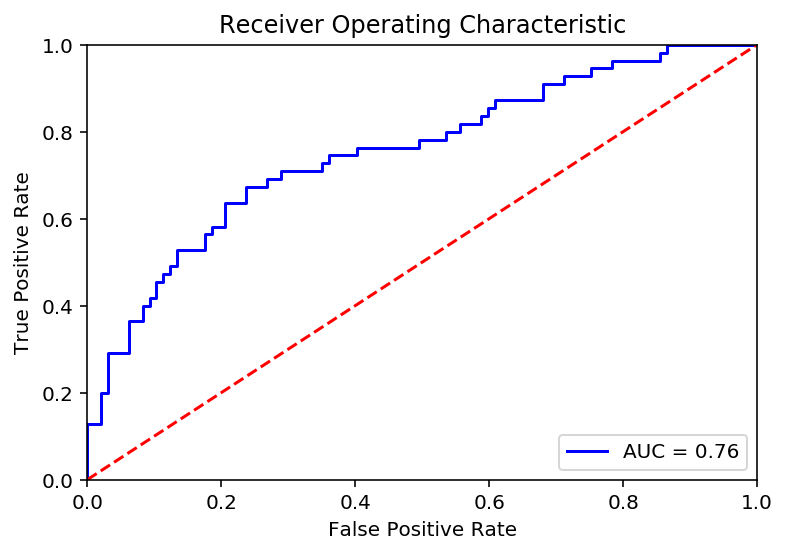

In [58]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
y_train_pred =lr.predict(X_train)
y_train_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,

In [60]:
lr_cm_train = confusion_matrix(y_train,y_train_pred)
lr_cm_train

array([[208,  29],
       [ 54,  62]], dtype=int64)

In [61]:
precision=lr_cm_train[0][0]/(lr_cm_train[0][0]+lr_cm_train[0][1])
precision

0.8776371308016878

In [62]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,y_train_pred) * 100))
print("Recall score : %f" %(recall_score(y_train,y_train_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train,y_train_pred) * 100))
print(confusion_matrix(y_train,y_train_pred)) 


Accuracy score: 76.487252
Recall score : 53.448276
ROC score : 70.605994

[[208  29]
 [ 54  62]]


In [63]:
# calculate the fpr and tpr for all thresholds of the classification
probs =lr.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

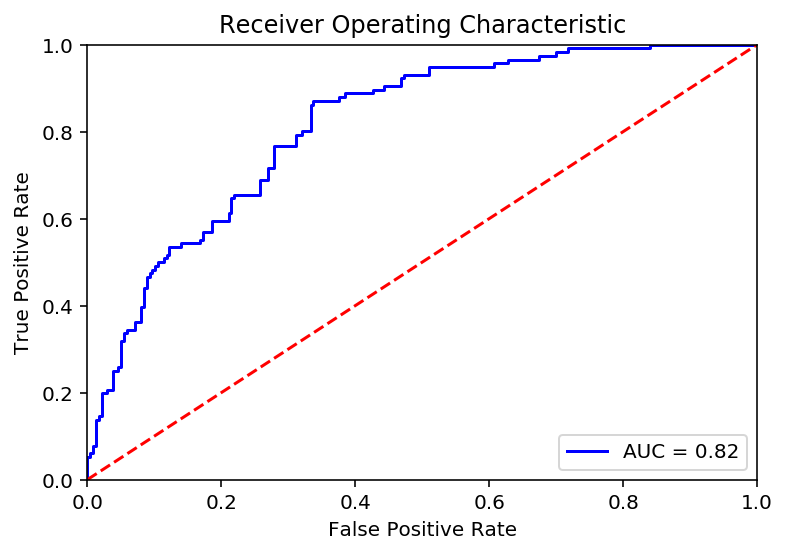

In [64]:
# PLOT ROC curve "Receiver Operating Characteristics"
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Super Vector Classification Test

In [65]:
#Support Vector Classification
from sklearn.svm import SVC
sc = SVC(kernel='rbf',probability=True)
sv = sc.fit(X_train,y_train)  #model building 

In [66]:
#Predicting on Test and Train data
sv_y_test = sv.predict(X_test)
print(sv_y_test)

[0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0]


In [67]:
sv_cm_test = confusion_matrix(y_test,sv_y_test)
sv_cm_test

array([[89,  8],
       [33, 22]], dtype=int64)

In [68]:
precision=sv_cm_test[0][0]/(sv_cm_test[0][0]+sv_cm_test[0][1])
precision

0.9175257731958762

In [69]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,sv_y_test) * 100))
print("Recall score : %f" %(recall_score(y_test,sv_y_test) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test,sv_y_test) * 100))
print(confusion_matrix(y_test,sv_y_test))


Accuracy score: 73.026316
Recall score : 40.000000
ROC score : 65.876289

[[89  8]
 [33 22]]


In [70]:
# calculate the fpr and tpr for all thresholds of the classification
probs =sv.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

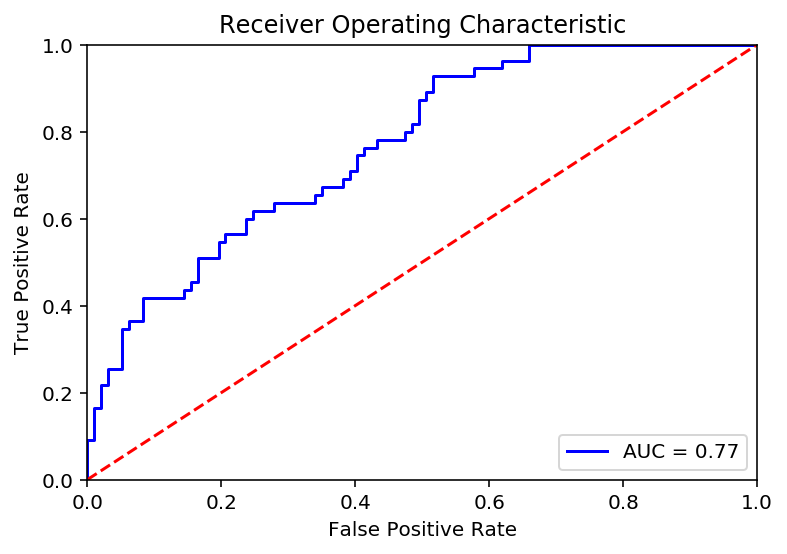

In [71]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
sv_y_train=sv.predict(X_train)
sv_y_train

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [73]:
sv_cm_train = confusion_matrix(y_test,sv_y_test)
sv_cm_train

array([[89,  8],
       [33, 22]], dtype=int64)

In [74]:
precision=sv_cm_train[0][0]/(sv_cm_train[0][0]+sv_cm_train[0][1])
precision

0.9175257731958762

In [75]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_train,sv_y_train) * 100))
print("Recall score : %f" %(recall_score(y_train,sv_y_train) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_train,sv_y_train) * 100))
print(confusion_matrix(y_train,sv_y_train))


Accuracy score: 75.070822
Recall score : 38.793103
ROC score : 65.810054

[[220  17]
 [ 71  45]]


In [76]:
# calculate the fpr and tpr for all thresholds of the classification
probs =sv.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

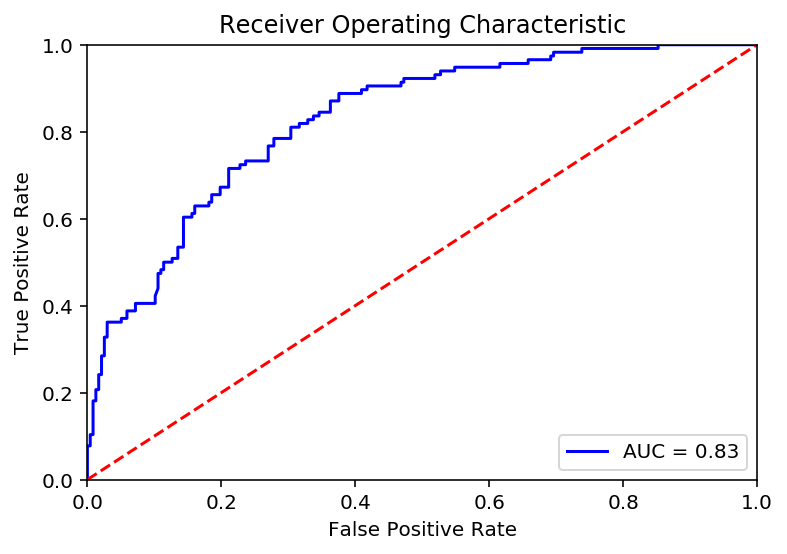

In [77]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()